In [42]:
import json
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
aapl = yf.Ticker("AAPL").history(period="3mo")
aapl["ticker"] = "AAPL"

msft = yf.Ticker("MSFT").history(period="3mo")
msft["ticker"] = "MSFT"

nvda = yf.Ticker("NVDA").history(period="3mo")
nvda["ticker"] = "NVDA"

df = aapl.append(msft).append(nvda).reset_index()

In [3]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
0,2021-12-06,164.080946,167.666390,164.070964,165.109650,107497000,0.00,0,AAPL
1,2021-12-07,168.864855,171.361674,168.125791,170.962173,120405400,0.00,0,AAPL
2,2021-12-08,171.910980,175.736109,170.482792,174.857224,116998900,0.00,0,AAPL
3,2021-12-09,174.687436,176.525091,173.698690,174.337875,108923700,0.00,0,AAPL
4,2021-12-10,174.987069,179.401443,174.467727,179.221664,115228100,0.00,0,AAPL
...,...,...,...,...,...,...,...,...,...
178,2022-02-25,237.169597,242.128743,233.770167,241.528854,52886600,0.00,0,NVDA
179,2022-02-28,239.879133,246.607983,237.029628,243.808472,47639300,0.00,0,NVDA
180,2022-03-01,242.868624,243.728478,231.280602,234.730011,41205600,0.00,0,NVDA
181,2022-03-02,237.559998,244.089996,234.149994,242.199997,38964200,0.04,0,NVDA


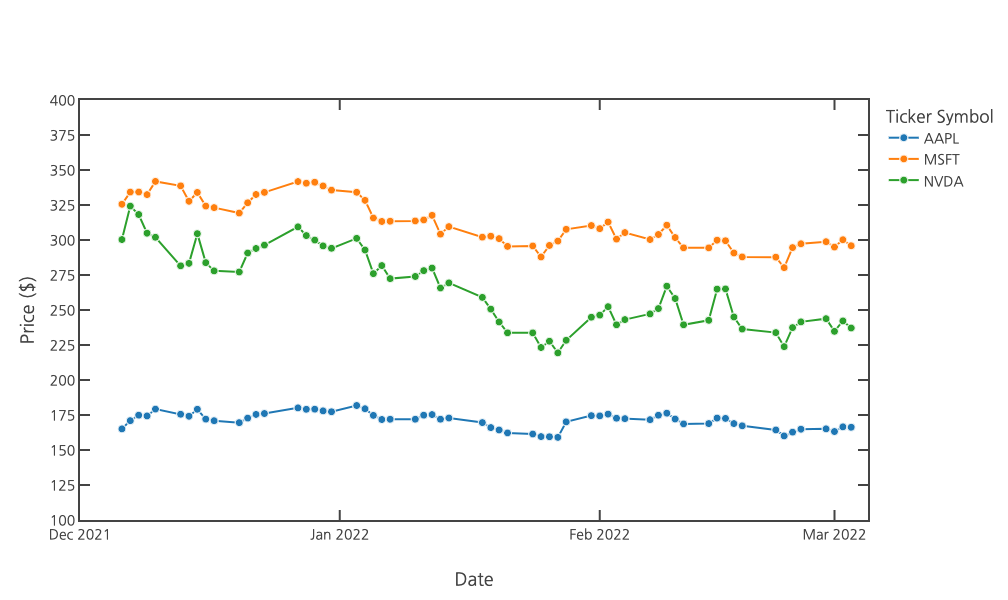

In [41]:
# fig = px.scatter(
#     df, x="low", y="high", color="treatment"
# )
# fig.update_traces(hovertemplate=f"{treatment}<br>Low: %{{x}}<br>High: %{{y}}<extra></extra>")

fig = go.Figure()
fig.layout.template = None

for ticker, group in df.groupby("ticker"):
    fig.add_trace(
        go.Scatter(
            x=group["Date"], 
            y=group["Close"], 
            name=ticker, 
            mode="markers+lines",
            marker_size=8,
            marker_line_color="white",
            marker_line_width=1,
            hovertemplate=f"<b>{ticker}</b><br>Date: %{{x}}<br>Closing Price: $%{{y}}<extra></extra>"
        )
    )

fig.update_layout(
    font_family="NanumGothic",
    xaxis=dict(
        title_text="Date",
        title_font_size=18,
        tickfont_size=14,
        showline=True,
        linewidth=2,
        mirror="ticks",
        showgrid=False,
        ticks="inside",
        tickwidth=2,
        ticklen=10,
        dtick="M1",
        range=["2021-12-01", "2022-03-05"]
    ),
    yaxis=dict(
        title_text="Price ($)",
        title_font_size=18,
        tickfont_size=14,
        showline=True,
        linewidth=2,
        mirror="ticks",
        showgrid=False,
        ticks="inside",
        tickwidth=2,
        ticklen=10,
        dtick=25,
        range=[100, 400]
    ),
    legend = dict(
        title_text="Ticker Symbol",
        font_size=14
    ),
    height=600,
    width=800
)

#fig.write_image("test.png", scale=2)
fig.show()

In [64]:
layout_scientific = json.load(open("layout-scientific.json"))

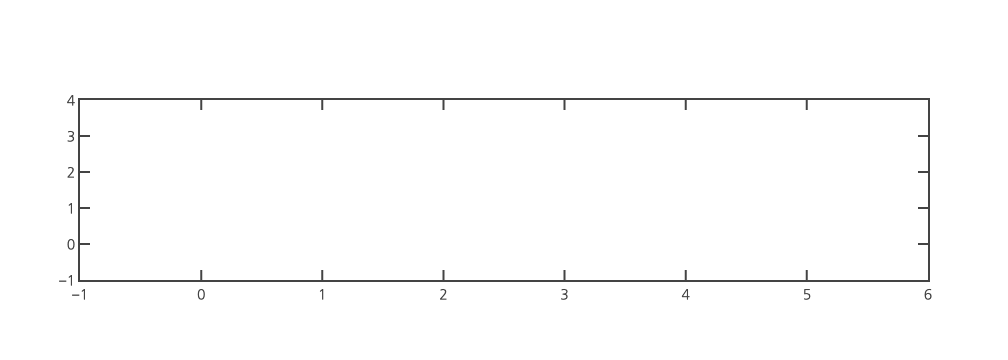

In [68]:
fig = go.Figure(layout_template=None)

fig.update_layout(layout_scientific)

fig.show()

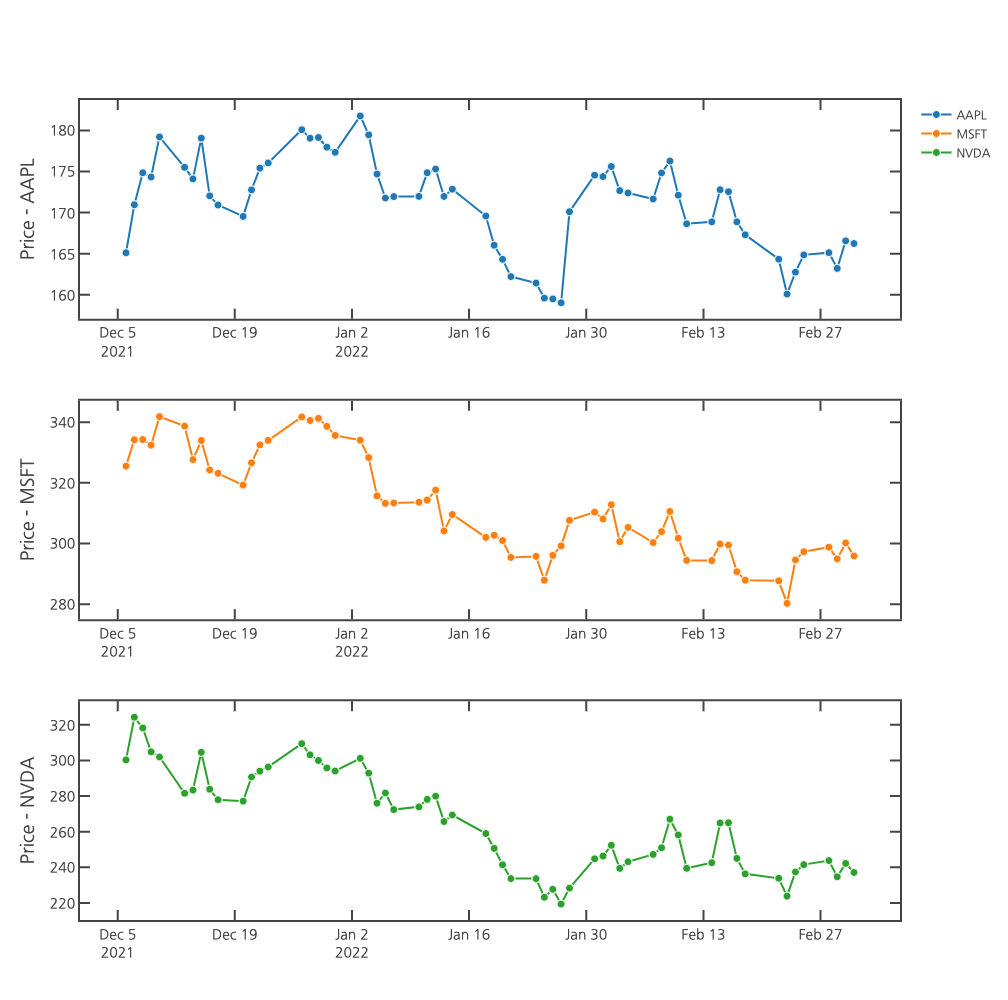

In [69]:
fig = make_subplots(rows=3, cols=1)
fig.layout.template = None

grp = df.groupby("ticker")

fig.add_trace(
    go.Scatter(
        x=grp.get_group("AAPL").Date, 
        y=grp.get_group("AAPL").Close,
        name="AAPL",
        mode="markers+lines",
        marker_size=8,
        marker_line_color="white",
        marker_line_width=1,
        hovertemplate="<b>AAPL</b><br>Date: %{x}<br>Closing Price: $%{y}<extra></extra>"
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=grp.get_group("MSFT").Date, 
        y=grp.get_group("MSFT").Close,
        name="MSFT",
        mode="markers+lines",
        marker_size=8,
        marker_line_color="white",
        marker_line_width=1,
        hovertemplate="<b>MSFT</b><br>Date: %{x}<br>Closing Price: $%{y}<extra></extra>"
    ),
    row=2,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=grp.get_group("NVDA").Date, 
        y=grp.get_group("NVDA").Close,
        name="NVDA",
        mode="markers+lines",
        marker_size=8,
        marker_line_color="white",
        marker_line_width=1,
        hovertemplate="<b>NVDA</b><br>Date: %{x}<br>Closing Price: $%{y}<extra></extra>"
    ),
    row=3,
    col=1
)
 
fig.update_layout(layout_scientific)
fig.update_xaxes(layout_scientific["xaxis"])
fig.update_yaxes(layout_scientific["yaxis"])
fig.update_layout(
    yaxis1_title_text="Price - AAPL",
    yaxis2_title_text="Price - MSFT",
    yaxis3_title_text="Price - NVDA",
    height=1000
)
fig.show()